In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


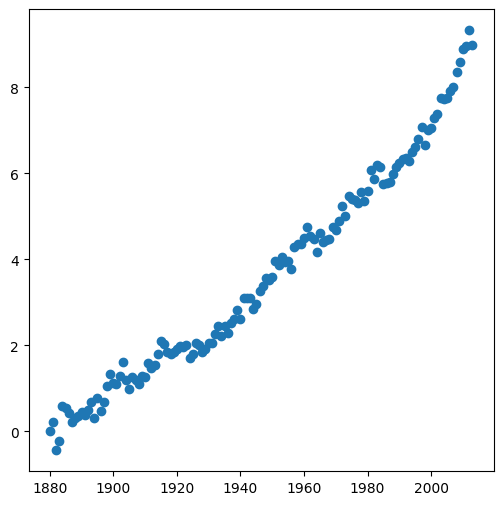

In [4]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.scatter(x, y)

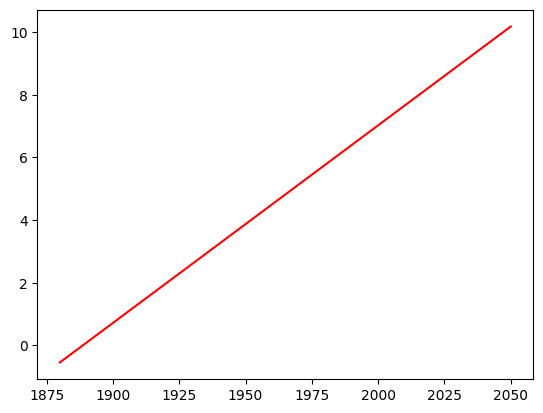

In [5]:
# Create first line of best fit

# get slope and intercept using linregress() function
slope, intercept, r_value, p_value, stderr = linregress(x, y)

# set new x, y for a line plot
x_pred = pd.Series([i for i in range(1880, 2051)])
y_pred = slope*x_pred + intercept

# Create a line plot
plt.plot(x_pred, y_pred, 'r')

In [6]:
res = linregress(x, y)
res

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [7]:
# Create second line of best fit

# set new range of data (from 2000 to the future)
df_forecast = df.loc[df['Year'] >= 2000]

# set new x, y for a new plot
x_forecast = df_forecast['Year']
y_forecast = df_forecast['CSIRO Adjusted Sea Level']

df_forecast

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


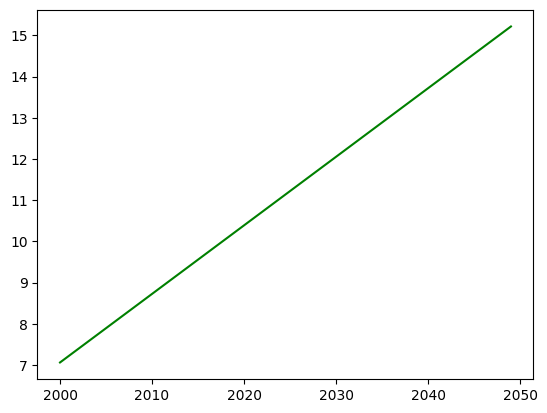

In [8]:
# get new slope + intercept using linregress() function (from new range of data set (from 2000))
slope, intercept, r_value, p_value, stderr = linregress(x_forecast, y_forecast)

# set new x, y for a line plot
x_pred2 = pd.Series([i for i in range(2000, 2050)])
y_pred2 = slope*x_pred2 + intercept

# Create a line plot
plt.plot(x_pred2, y_pred2, 'green')

Text(0, 0.5, 'Sea Level (inches)')

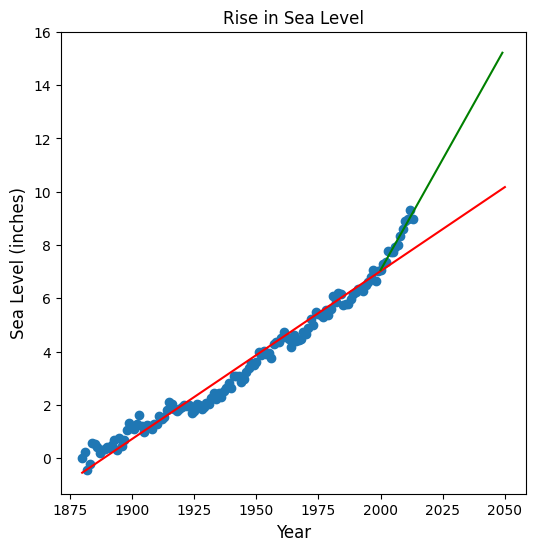

In [9]:
# add all plots in 1 figure

# first scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax = plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

# line plot (1880-2050)
plt.plot(x_pred, y_pred, 'r')

# line plot (2000-2050)
plt.plot(x_pred2, y_pred2, 'green')

# Add labels and title
plt.title('Rise in Sea Level')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sea Level (inches)', fontsize = 12)